# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Author : Shravani Deshmukh¶

## Task 2 : Prediction Using Unsupervised ML

### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Exploring Dataset

In [4]:
#Checking shape of the dataset
print(dataset.shape)

(150, 6)


In [5]:
#Information about dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [6]:
#Describing dataset
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#Finding unique species
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Finding the optimum number of clusters

In [10]:
X = dataset.iloc[:, [1,2,3,4]].values

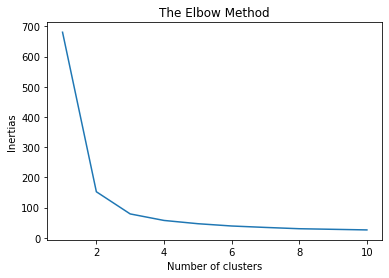

In [12]:
from sklearn.cluster import KMeans
def elbowMethod(num_clusters, inertias):
    plt.plot(num_clusters, inertias)
    plt.title("The Elbow Method")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertias")
    plt.show()
inertias = []
clusters = range(1,11)
for i in clusters:
    k_means = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
    k_means.fit(X)
    inertias.append(k_means.inertia_)
elbowMethod(clusters, inertias)

### The optimum number of clusters is where the Elbow occurs.
### OBSERVATION: From the above plot we can observe that the optimum number of clusters can be chosen as "3".  

## Predicting clusters

In [13]:
kmeans = KMeans(n_clusters=3 , init='k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [14]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

## Visualising the clusters

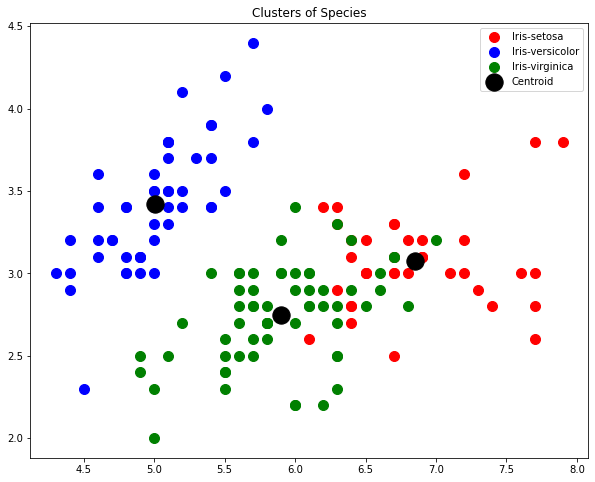

In [16]:
plt.figure(figsize = (10,8))
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans ==0,1] , s=100 , c='red' , label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans ==1,1] , s=100 , c='blue' , label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans ==2,1] , s=100 , c='green' , label = 'Iris-virginica')
#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroid')
plt.title('Clusters of Species')
plt.legend()
plt.show()